# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [49]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [326]:
import numpy as np
# Потрібно для кольорів в завданні 4

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [63]:
df[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [51]:
# Розмір датафрейму
df_shape = df.shape
df_shape

(10886, 19)

In [52]:
# Перевіримо, який інтервал часу між рядками
intervals = df.hour.diff().dropna()
intervals

# diff() - Обчислює різницю між поточним і попереднім значенням серії
# dropna() - Видаляє NaN (відсутнє значення), яке виникає для першого елементу, бо в нього немає попередника

datetime
2011-01-01 01:00:00    1.0
2011-01-01 02:00:00    1.0
2011-01-01 03:00:00    1.0
2011-01-01 04:00:00    1.0
2011-01-01 05:00:00    1.0
                      ... 
2012-12-19 19:00:00    1.0
2012-12-19 20:00:00    1.0
2012-12-19 21:00:00    1.0
2012-12-19 22:00:00    1.0
2012-12-19 23:00:00    1.0
Name: hour, Length: 10885, dtype: float64

In [53]:
# Виведемо кількість повторень кожного значення
intervals.value_counts()

hour
 1.0     10389
-23.0      454
 2.0        36
 3.0         5
-11.0        1
Name: count, dtype: int64

In [54]:
# Виведемо найчастіший інтервал
most_common_interval = intervals.value_counts().idxmax()
# round(intervals.value_counts().idxmax())
int(most_common_interval)

1

In [68]:
print(f'Даних {df_shape[0]} рядків, {df_shape[1]} колонок. В кожному рядку сума оренд велосипедів за {int(most_common_interval)} годину')

Даних 10886 рядків, 19 колонок. В кожному рядку сума оренд велосипедів за 1 годину


Оскільки програмно, окрім 1 години, зустрічається також різниця між двома сусідніми інвойсами, що дорівнює 2, 3, та -11 це свідчить про наявність пропущених часових відміток. Значення -23 отримано, оскільки від 0 години відняли 23 годину, але фактично це різниця в 1 годину.

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [72]:
daily_sum = df['count'].resample('D').sum()
daily_sum

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

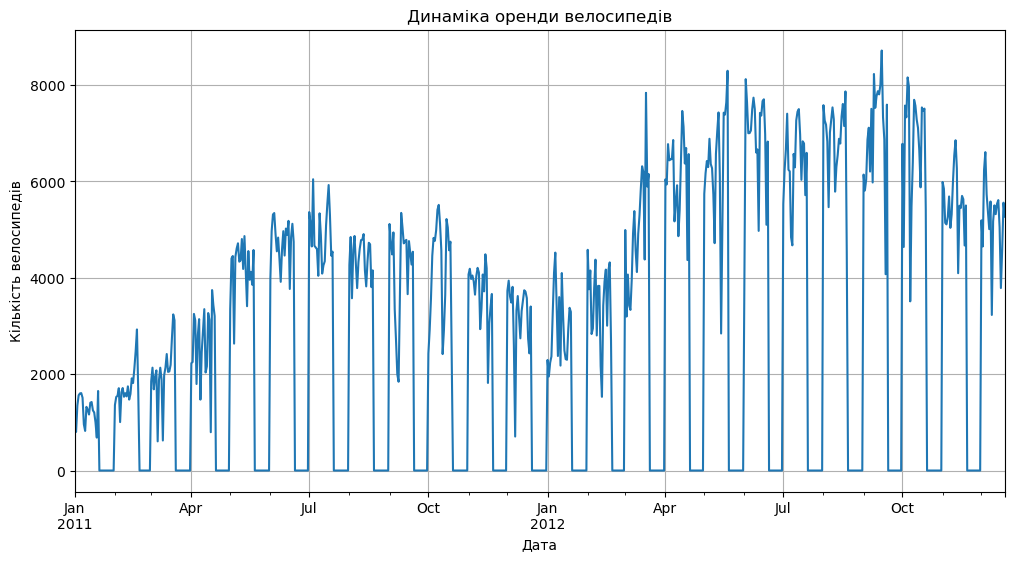

In [80]:
daily_sum.plot(
    figsize=(12,6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість велосипедів',
    grid=True
);

In [79]:
df.pivot_table(index=['year', 'month'],
               columns='day',
               values='count',
               aggfunc='sum')

day           1     2     3     4     5     6     7     8     9     10    11  \
year month                                                                     
2011 1       985   801  1349  1562  1600  1606  1510   959   822  1321  1263   
     2      1360  1526  1550  1708  1005  1623  1712  1530  1605  1538  1746   
     3      1851  2134  1685  1944  2077   605  1872  2133  1891   623  1977   
     4      2227  2252  3249  3115  1795  2808  3141  1471  2455  2895  3348   
     5      3351  4401  4451  2633  4433  4608  4714  4333  4362  4803  4182   
     6      3974  4968  5312  5342  4906  4548  4833  4401  3915  4586  4966   
     7      5362  5119  4649  6043  4665  4629  4592  4040  5336  4881  4086   
     8      4266  4845  3574  4576  4866  4294  3785  4326  4602  4780  4792   
     9      5115  4727  4484  4940  3351  2710  1996  1842  3544  5345  5046   
     10     2429  2918  3570  4456  4826  4765  4985  5409  5511  5117  4563   
     11     4068  4186  3974  4046  3926  3649  4035  4205  4109  2933  3368   
     12     3727  3940  3614  3485  3811  2594   705  3322  3620  3190  2743   
2012 1      2294  1951  2236  2368  3272  4098  4521  3425  2376  3598  2177   
     2      4579  3761  4151  2832  2947  3784  4375  2802  3830  3831  2169   
     3      4990  3194  4066  3423  3333  3956  4916  5382  4569  4118  4911   
     4      6041  5936  6772  6436  6457  6460  6857  5169  5585  5918  4862   
     5      5740  6169  6421  6296  6883  6359  6273  5728  4717  6572  7030   
     6      4127  8120  7641  6998  7001  7055  7494  7736  7498  6598  6664   
     7      5531  6227  6660  7403  6241  6207  4840  4672  6569  6290  7264   
     8      7580  7261  7175  6824  5464  7013  7273  7534  7286  5786  6299   
     9      6140  5810  6034  6864  7112  6203  7504  5976  8227  7525  7767   
     10     6778  4639  7572  7328  8156  7965  3510  5478  6392  7691  7570   
     11     5986  5847  5138  5107  5259  5686  5035  5315  5992  6536  6852   
     12     5191  4649  6234  6606  5729  5375  5008  5582  3228  5170  5501   

day           12    13    14    15    16    17    18    19  
year month                                                  
2011 1      1162  1406  1421  1248  1204  1000   683  1650  
     2      1472  1589  1913  1815  2115  2475  2927  1635  
     3      2132  2417  2046  2056  2192  2744  3239  3117  
     4      2034  2162  3267  3126   795  3744  3429  3204  
     5      4864  4105  3409  4553  3958  4123  3855  4575  
     6      4460  5020  4891  5180  3767  4844  5119  4744  
     7      4258  4342  5084  5538  5923  5302  4458  4541  
     8      4905  4150  3820  4338  4725  4694  3805  4153  
     9      4713  4763  4785  3659  4760  4511  4274  4539  
     10     2416  2913  3644  5217  5041  4570  4748  2424  
     11     4067  3717  4486  4195  1817  3053  3392  3663  
     12     3310  3523  3740  3709  3577  2739  2431  3403  
2012 1      4097  3214  2493  2311  2298  2935  3376  3292  
     2      1529  3422  3922  4169  3005  4154  4318  2689  
     3      5298  5847  6312  6192  4378  7836  5892  6153  
     4      5409  6398  7460  7132  6370  6691  4367  6565  
     5      7429  6118  2843  5115  7424  7384  7639  8294  
     6      4972  7421  7363  7665  7702  6978  5099  6825  
     7      7446  7499  6969  6031  6830  6786  5713  6591  
     8      6544  6883  6784  7347  7605  7148  7865  4549  
     9      7870  7804  8009  8714  7333  6869  4073  7591  
     10     7282  7109  6639  5875  7534  7461  7509  5424  
     11     6269  4094  5495  5445  5698  5629  4669  5499  
     12     5319  5532  5611  5047  3786  4585  5557  5267

**Висновки з побудованого графіку:**
1. Графік має "заломи", оскільки наявні дані тільки з 1 по 19 число кожного місяця.  
Це може бути спричинено графіком роботи сервісу з надання послуг оренди або технічними помилками: збої в записі даних після 19 числа.  
На графіку можна прибрати заломи, побудувавши його тільки для наявних даних з 1 по 19 число кожного місяця (див. нижче). Для цього можна згрупувати за датою, без resample('D'), і тоді не буде створюватись повний набір днів з 1 числа до останнього числа місяця.
2. Загальні тенденції:
- попит на оренду зростав протягом 2011-2012 років. Особливо помітне збільшення в теплі сезони;
- другий рік має вищий рівень оренд - можливо, маркетинг або розширення сервісу.
3. Сезонні коливання:
- Весна-літо: видно стабільні піки попиту, особливо з квітня до жовтня. Це може бути пов'язано з комфортними погодними умовами.
- Осінь-зима: помітний спад, причини - холод, дощі, менше туристів.
4. Візуалізація показує, що є періоди з аномально високими та низькими значеннями.
  Аномально високі значення можуть вказувати на:
  - Події або акції (наприклад, велофест або день без автомобілів);
  - Нетипову погоду у вихідний день.  
   Аномально низькі значення - ймовірно:
  - Погані погодні умови (сильний дощ, вітер, мороз, сніг);
  - Технічні збої в реєстрації.


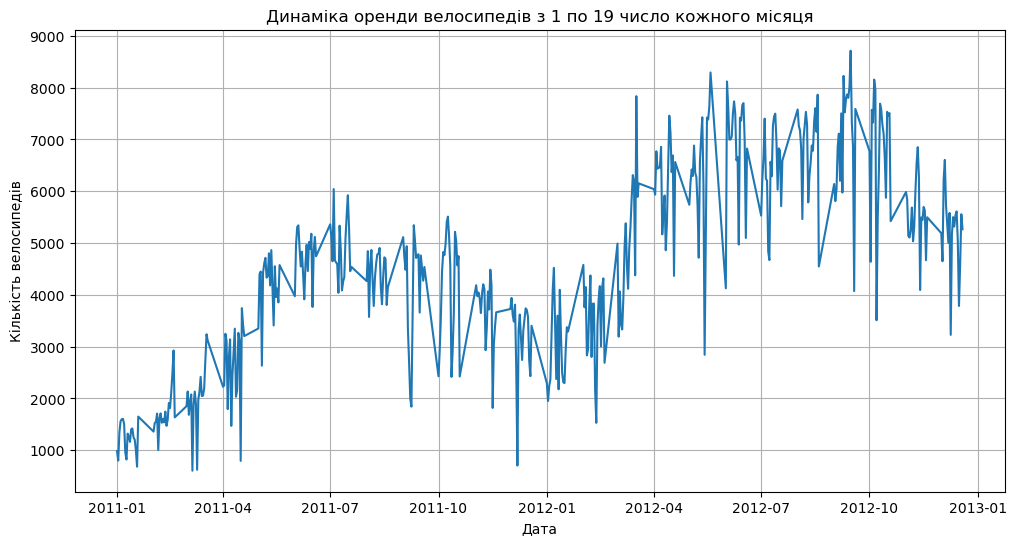

In [98]:
df_filter_by_day = df[(df['day'] >= 1) & (df['day'] <= 19)]

daily_sum_filter = df_filter_by_day.groupby('date')['count'].sum()

daily_sum_filter.plot(
    figsize=(12,6),
    title='Динаміка оренди велосипедів з 1 по 19 число кожного місяця',
    xlabel='Дата',
    ylabel='Кількість велосипедів',
    grid=True
);


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Висновки:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [101]:
avg_count_for_season = df.groupby('season')['count'].mean()
avg_count_for_season

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

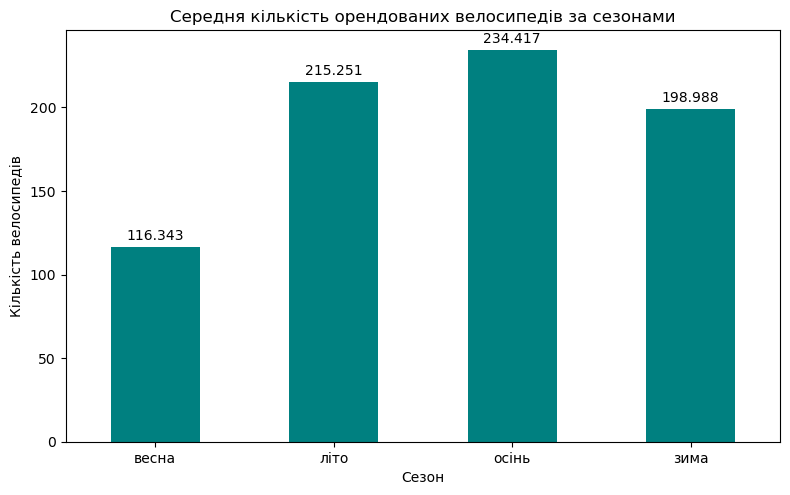

In [141]:
ax1 = avg_count_for_season.plot.bar(
    figsize=(8,5),
    title='Середня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Кількість велосипедів',
    color='teal'    
)
plt.tight_layout()

# Налаштування підписів
ax1.set_xticklabels(['весна', 'літо', 'осінь', 'зима'])
plt.xticks(rotation=0)
ax1.bar_label(ax1.containers[0], padding=3, fontsize=10);

In [123]:
ratio_seasons = avg_count_for_season[3] / avg_count_for_season[1]
ratio_seasons.round(2)

2.01

**Висновки:**
1. В осінній сезон найбільша середня кількість оренди велосипедів, зі значенням 234.417 одиниць на годину.
2. Можна виділити декілька причин такої сезонної закономірністі:  
- Комфортна погода: восени зазвичай немає екстремальної спеки чи холоду, і це сприяє активному користуванню велосипедами;  
- Повернення до міського ритму: вересень — це початок навчального року, більше студентів, офісних працівників повертаються в місто.
3. Оренда між найпопулярнішим осіннім та найменш популярним весняним сезоном відрізняється в трохи більше ніж у 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [125]:
monthly_counts = df.groupby('month')['count'].mean()
monthly_counts

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

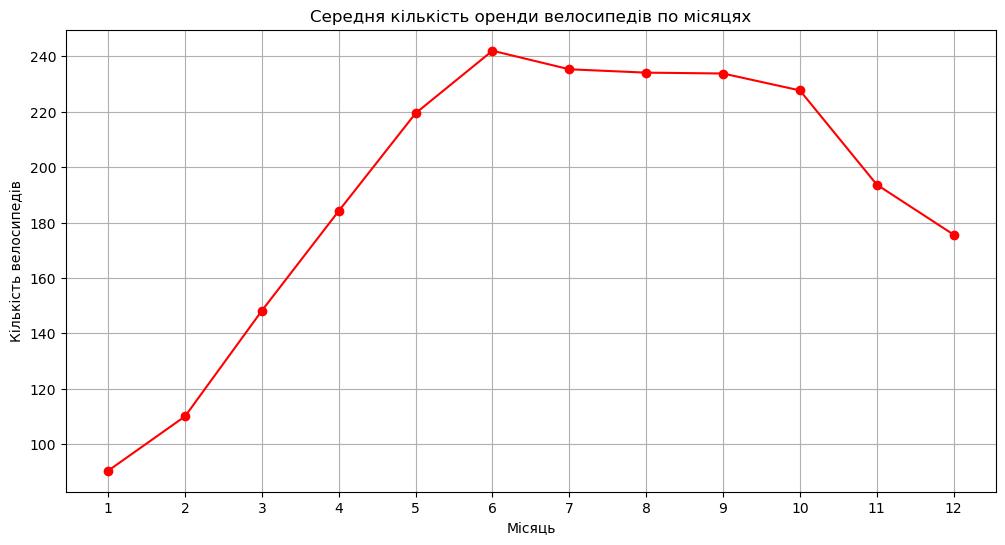

In [132]:
ax2 = monthly_counts.plot(
    figsize=(12,6),
    marker='o',
    color='red',
    title='Середня кількість оренди велосипедів по місяцях',
    xlabel='Місяць',
    ylabel='Кількість велосипедів',
    grid=True
)
# Встановлюємо 12 поділок по осі X
ax2.set_xticks(range(1, 13));

In [136]:
# зміна між місяцями
monthly_diff = monthly_counts.diff()
monthly_diff

month
1           NaN
2     19.636814
3     38.166482
4     35.990805
5     35.298814
6     22.572368
7     -6.706140
8     -1.207237
9     -0.313141
10    -6.106049
11   -34.021954
12   -18.063243
Name: count, dtype: float64

**Висновки:**
1. Пік оренди припадає на червень (6 місяць), оренда перевищує 240 одиниць. Найбільший спад в листопаді, відносно попереднього місяця, на 34 одиниці.
2. Закономірність попиту на оренду майже збігається з результатами з попереднього завдання. Осінь та літо - найвища середня оренда, весна - найнижча. В цьому аналізі влітку оренда все ж таки найвища.
3. Клімат суттєво впливає на оренду велосипедів протягом року:
    - температура: теплі місяці (травень-жовтень) приваблюють як випадкових, так і зареєстрованих користувачів.
    - опади та вітер: холод, дощі та сильний вітер — стримують попит. Зимові місяці часто містять несприятливі погодні умови.
    - світловий день: улітку більше часу для катання після роботи або навчання.


## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [250]:
distribution_weather = df.groupby('weather').size()
distribution_weather

weather
1    7192
2    2834
3     859
4       1
dtype: int64

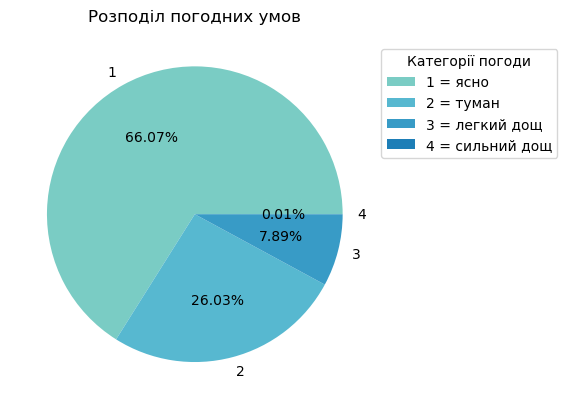

In [251]:
distribution_weather.plot.pie(
    autopct='%1.2f%%',
    title='Розподіл погодних умов',
    ylabel='',
    colors=plt.cm.GnBu(np.linspace(0.5, 0.8, 4))
    # colors=[plt.cm.tab20c(0.4), plt.cm.tab20c(0.45), plt.cm.tab20c(0.5), plt.cm.tab20c(0.55)]
)
plt.legend(
    title="Категорії погоди", 
    labels=['1 = ясно', '2 = туман', '3 = легкий дощ', '4 = сильний дощ'],
    loc="center right",
    bbox_to_anchor=(1.5, 0.8),  # зміщення далі праворуч
);

**Висновки:**
1. В датасеті переважає ясна погода.
2. Присутній тільки один запис із сильним дощем. Частка цих даних 0.01%.
3. Сприятлива погода підвищує попит на оренду.
Ясні дні з комфортною температурою - найкращі для катання.
У суху погоду зростає популярність екологічного транспорту, на заміну авто.
Весна та осінь часто є піковими сезонами через м’яку температуру та мінімум опадів.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

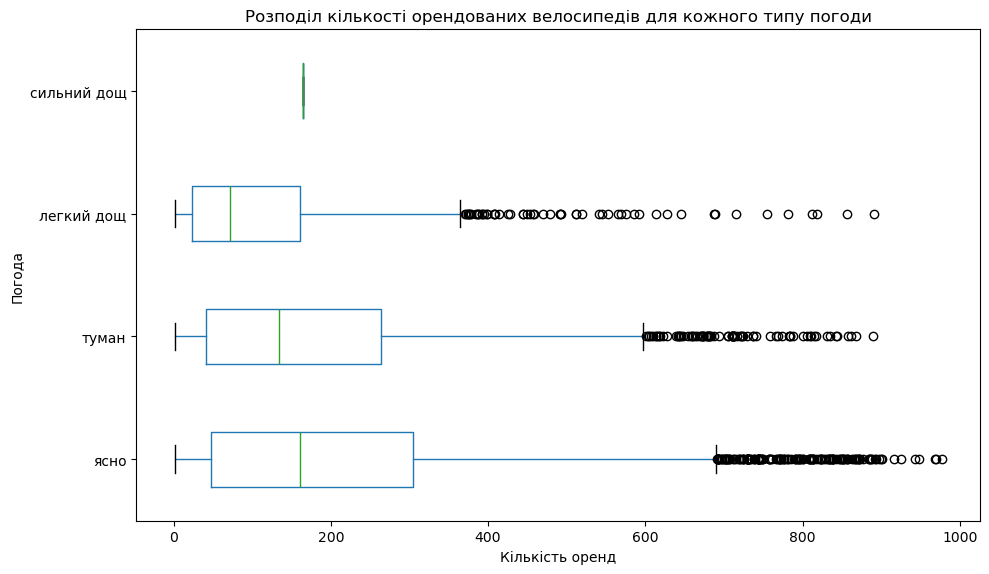

In [270]:
df.boxplot(
    column='count',
    by='weather',
    vert=False,   # горизонтальна орієнтація
    figsize=(10,6),
    grid=False
)
plt.title('Розподіл кількості орендованих велосипедів для кожного типу погоди')
plt.suptitle('')
plt.ylabel('Погода')
plt.xlabel('Кількість оренд')
plt.yticks(ticks=[1,2,3,4], labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'])
plt.tight_layout();


**Висновки:**
1. Ясна погода має найширший діапазон між мінімумом і максимумом, а також саму високу верхню межу коробки. Це означає, що оренда в ясні дні сильно коливається - від буденних значень до дуже високих піків. Можливі причини: активні вихідні, свята, події або сезонний попит у гарну погоду.
2. Викиди (outliers) спостерігаються при ясній погоді, туманній та легкому дощі. До прикладу, в ясні дні може бути свято або марафон, тоді оренда зростає аномально.
3. Медіанне значення оренди найвище при ясній погоді. Це підтверджує, що саме в гарні дні попит найбільш стабільно високий.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

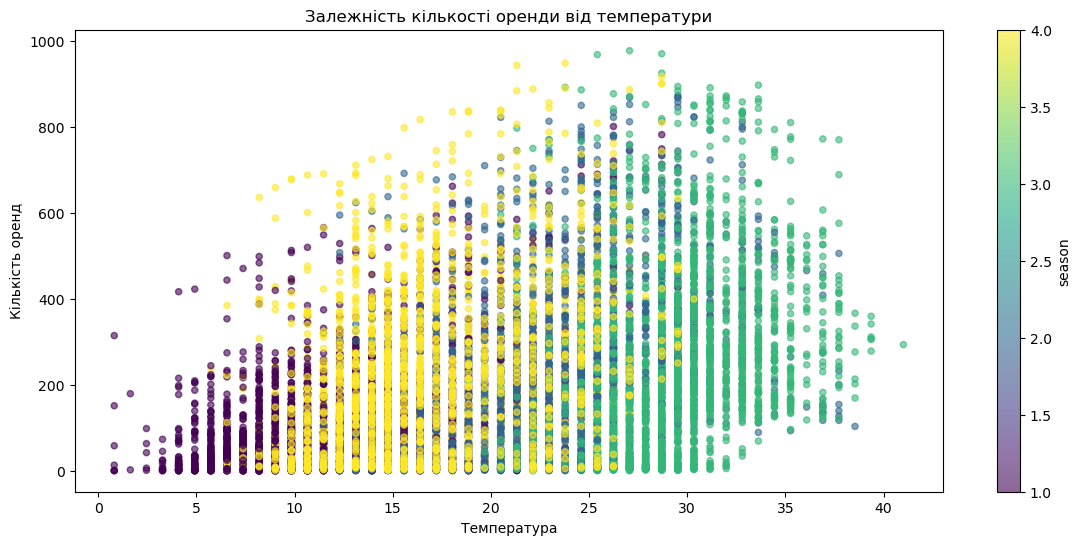

In [325]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    figsize=(14,6),
    title='Залежність кількості оренди від температури',
    xlabel='Температура',
    ylabel='Кількість оренд',
    alpha=0.6
);

**Висновки:**
- Зв’язок між температурою та кількістю орендованих велосипедів є. Чим вища температура, тим більше оренд - на графіку видно концентровані точки з високим count в області 15–33 градусів.
- Це позитивна кореляція: у теплі дні попит зростає.
- У холодних діапазонах (нижче 10 градусів) орендують значно менше.
- Кольори маркерів на графіку відображають різні сезони (1=весна, 2=літо, 3=осінь, 4=зима). Видно, що при однаковій температурі в теплих сезонах оренд більше, ніж у холодних. Це свідчить, що температура не єдиний фактор, що впливає на оренду, а ще й сезонна поведінка людей.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [287]:
user_ratio = df.groupby('weekday_num')[['registered', 'casual']].mean()
user_ratio.round(1)

,registered,casual
weekday_num,,
0,160.5,29.8
1,166.7,23.0
2,165.9,22.5
3,173.3,24.0
4,166.8,31.0
5,133.0,63.6
6,123.8,57.1


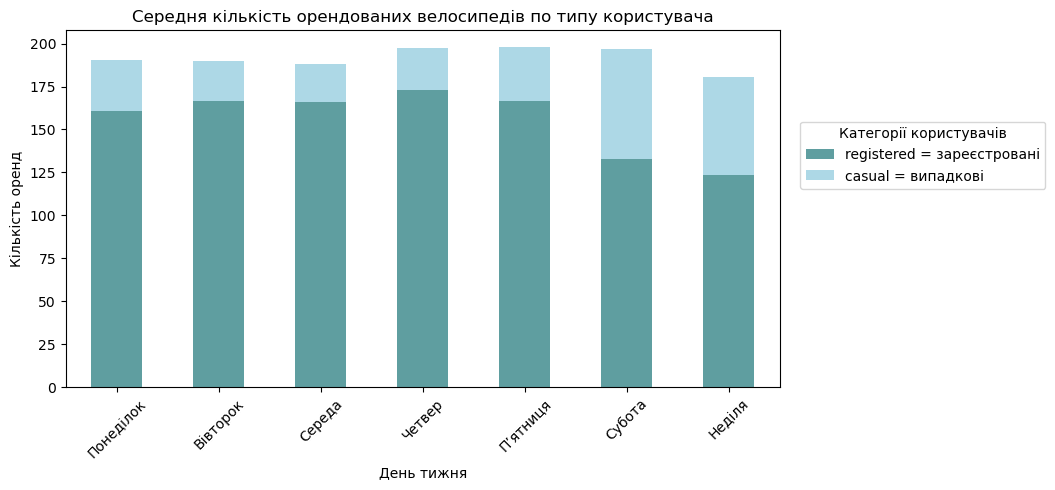

In [314]:
ax3 = user_ratio.plot.bar(
    figsize=(8,5),
    title='Середня кількість орендованих велосипедів по типу користувача',
    xlabel='День тижня',
    ylabel='Кількість оренд',
    color=['cadetblue', 'lightblue'],
    stacked=True       # Діаграма з накопиченням
)
ax3.set_xticklabels(['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(
    title="Категорії користувачів", 
    labels=['registered = зареєстровані', 'casual = випадкові'],
    loc="center",
    bbox_to_anchor=(1.2, 0.65),  # зміщення далі праворуч
);

**Висновки:**
1. Кількість оренд від зареєстрованих користувачів з понеділка по п'ятницю найбільша. В суботу та неділю ці значення значно нижчі.
2. Така різницю в поведінці зареєстрованих користувачів протягом тижня обувлена тим, що понеділок-п'ятниця завзичай робочі та навчальні дні, і багато хто використовує велосипед як спосіб доїзду на роботу, навчання або по справам. Ці користувачі в робочі дні користуються сервісом стабільно. У вихідні навпаки зниження активності, бо вони не мають потреби в щоденному транспорті.
3. Субота та неділя мають виражені піки саме в випадкових (casual) орендах. Поведінка випадкових користувачів непередбачувана, зате прив'язана до погоди, свят, настрою.


